In [1]:
import sys
sys.path.insert(1, './LIB')
from Utils import *
import math
import numpy as np
import copy

In [1]:
#Paths for the IRC trajectory in xyz format. One third of the points were selected along the trajectory.
trj_path="./STRUCT/C16N2H24SO5_ord_100.xyz"
#Folder for the original DFTB3 parameters
skf_folder_path="./PARAM/ORIG/dat/slko/3ob-3-1"

#Folder for storing the modified parameters "IDPRM" is a string to be replaced
modif_skf_folder_path="./PARAM/MODIF/TEST_CH_EXP1_IDPRM/params/dat/slko/3ob-3-1" 
# Path to indicate to sqm where the modified parameters are
amber_home="./PARAM/MODIF/TEST_CH_EXP1_IDPRM/params" 
# Path to sqm
sqm_path="/home/${USER}/amber/bin/sqm"
# Folder to put sqm outputs
test_path="./RUNS/TEST_CH_EXP1"

In [3]:
#Reaction coordinate, and DFT and DFTB3 energies for IRC geometries  
y_dft=[0.0, 0.0168, 0.0369, 0.06126, 0.09125, 0.12602, 0.16571, 0.2085, 0.25654, 0.30957, 0.36909, 0.4302, 0.49548, 0.56931, 0.64758, 0.72643, 0.81547, 0.91198, 1.021, 1.15674, 1.27559, 1.42542, 1.58983, 1.77057, 1.96948, 2.1899, 2.43142, 2.70312, 3.00706, 3.34357, 3.72412, 4.15019, 4.63093, 5.16423, 5.7851, 6.45505, 7.22844, 8.09619, 9.05818, 10.11931, 11.29174, 12.60299, 14.10541, 15.88199, 18.06321, 20.76763, 23.29271, 24.81067, 25.31752, 24.94048, 24.24781, 23.60706, 23.04356, 22.53833, 22.07837, 21.65472, 21.26847, 20.89778, 20.5484, 20.22006, 19.9099, 19.61723, 19.34192, 19.08346, 18.84094, 18.61491, 18.40541, 18.21223, 18.03287, 17.86753, 17.71647, 17.57444, 17.44324, 17.32183, 17.20731, 17.09794, 16.99701, 16.901, 16.8069, 16.71761, 16.63238, 16.55068, 16.47214, 16.39663, 16.32376, 16.25357, 16.18569, 16.12003, 16.05668, 15.99539, 15.9357, 15.87805, 15.82241, 15.76869, 15.71641, 15.66591, 15.61717, 15.56944, 15.52328, 15.479]
x = np.array([-9.21011, -9.14649, -9.08263, -9.01873, -8.95489, -8.89108, -8.82737, -8.76358, -8.69968, -8.63566, -8.57159, -8.50755, -8.44354, -8.37959, -8.31566, -8.25176, -8.18789, -8.12409, 
              -8.06032, -7.99666, -7.93292, -7.86916, -7.80528, -7.7413, -7.67727, -7.6132, -7.54911, -7.48501, -7.42092, -7.35687, -7.29288, -7.22911, -7.16552, -7.10187, -7.03812, -6.97419, 
              -6.91015, -6.84608, -6.78207, -6.71815, -6.65436, -6.59057, -6.52688, -6.46331, -6.39997, -6.33635, -6.2725, -6.20856, -6.14464, -6.08079, -6.01691, -5.95302, -5.88908, -5.82514, 
              -5.76135, -5.69769, -5.63463, -5.57168, -5.50928, -5.44626, -5.38286, -5.31922, -5.2554, -5.19153, -5.12761, -5.06368, -4.9997, -4.93567, -4.8716, -4.80749, -4.74335, -4.67921, 
              -4.61507, -4.55094, -4.48683, -4.42276, -4.35873, -4.29469, -4.23064, -4.16655, -4.10243, -4.03831, -3.97423, -3.91021, -3.8463, -3.78236, -3.71832, -3.65419, -3.59004, -3.52588, 
              -3.46171, -3.39754, -3.33338, -3.26922, -3.20506, -3.14095, -3.07689, -3.01293, -2.94894, -2.8849, -2.82079, -2.75668, -2.69266, -2.62903, -2.56562, -2.5019, -2.43786, -2.37371, 
              -2.30955, -2.24538, -2.18121, -2.11704, -2.05287, -1.9887, -1.92453, -1.86037, -1.7962, -1.73203, -1.66786, -1.6037, -1.53953, -1.47537, -1.4112, -1.34704, -1.28289, -1.21873, 
              -1.15458, -1.09043, -1.02628, -0.96215, -0.89802, -0.83391, -0.76981, -0.70571, -0.64159, -0.57744, -0.51328, -0.44911, -0.38495, -0.32078, -0.25661, -0.19245, -0.12828, -0.06413, 
              0.00002, 0.06411, 0.12825, 0.19236, 0.25646, 0.32057, 0.38468, 0.44881, 0.51294, 0.57708, 0.64123, 0.70538, 0.76954, 0.8337, 0.89786, 0.96202, 1.02619, 1.09035, 1.15452, 1.21869, 
              1.28286, 1.34702, 1.41116, 1.47517, 1.53879, 1.60212, 1.66575, 1.7298, 1.79395, 1.85811, 1.92227, 1.98644, 2.0506, 2.11477, 2.17894, 2.2431, 2.30727, 2.37143, 2.43559, 2.49974, 
              2.56389, 2.62802, 2.69215, 2.75625, 2.82036, 2.88447, 2.94859, 3.01272, 3.07687, 3.14102, 3.20518, 3.26934, 3.33349, 3.39765, 3.46178, 3.52589, 3.58994, 3.65399, 3.71803, 3.78214, 
              3.84626, 3.91039, 3.97452, 4.03862, 4.10267, 4.16669, 4.23067, 4.29469, 4.35872, 4.42279, 4.48685, 4.55091, 4.61497, 4.67903, 4.74304, 4.80697, 4.87079, 4.93475, 4.99878, 5.06289, 
              5.12703, 5.19116, 5.25527, 5.31927, 5.38314, 5.44686, 5.51055, 5.57434, 5.6382, 5.70221, 5.76628, 5.83039, 5.89452, 5.95865, 6.02278, 6.08691, 6.15104, 6.21516, 6.27927, 6.34337, 
              6.40747, 6.47155, 6.53563, 6.59969, 6.66376, 6.72782, 6.79189, 6.85595, 6.92001, 6.98406, 7.04811, 7.11216, 7.17622, 7.2403, 7.30438, 7.36849, 7.43259, 7.49671, 7.56082, 7.62492, 
              7.68901, 7.75308, 7.81716, 7.88124, 7.94533, 8.00945, 8.07357, 8.1377, 8.20183, 8.26595, 8.33007, 8.39417, 8.45826, 8.52232, 8.58638, 8.65043, 8.71449, 8.77857, 8.84266, 8.90675, 
              8.97082, 9.03485, 9.09884, 9.16279, 9.22674, 9.2907, 9.35468, 9.41868, 9.48271, 9.54675, 9.6108, 9.67485, 9.73888, 9.80288, 9.86682])

x_dft=x[0:300:3]

y_dftb=[0.0, 0.0629313999961596, 0.11697400999400998, 0.1847027099938714, 0.3076601499997196, 0.24528682999516604, 0.3590820999961579, 0.36195917999430094, 0.4893085399962729, 0.4763074999937089, 0.6120030199963367, 0.725685909994354, 0.7545161799935158, 0.7725700800001505, 0.9778213999961736, 0.9883817199952318, 1.1627562099965871, 1.2167839600006118, 1.4123662099955254, 1.5549310599963064, 1.7538442099976237, 1.9656749899950228, 2.099301709997235, 2.227515709993895, 2.422247909998987, 2.589213519997429, 2.841757919995871, 3.009616379997169, 3.2511471999969217, 3.4675381399938487, 3.7503572999994503, 4.023145799998019, 4.246686479993514, 4.639024329997483, 5.089914839998528, 5.489420159996371, 6.024299009994138, 6.639478309996775, 7.348350569998729, 8.22996117999719, 9.043185769995034, 9.85877428999811, 10.553482489995076, 11.011434909996751, 10.903935689995706, 10.540232449995528, 10.649029259999224, 11.353236529997957, 12.27064129000064, 13.516032559993619, 14.463414719997672, 14.970182159995602, 15.147226399996725, 15.025829129997874, 14.651096639994648, 14.350293399998918, 13.90738078999857, 13.569496479998634, 13.20916269999725, 12.947718269999314, 12.75152844999684, 12.52187209999829, 12.447895220000646, 12.227578419995552, 12.137557570000354, 12.027675220000674, 11.936803639997379, 11.898920089995954, 11.816533089993754, 11.795476409999537, 11.866254649998154, 11.780145489996357, 11.826336399994034, 11.80075358999602, 11.833352359994024, 11.865399219997926, 11.927898409994668, 11.830980009995983, 11.956470839999383, 11.998836569997366, 11.995289669997874, 12.010483309997653, 12.097352769997087, 12.098122469993541, 12.215690439996251, 12.237727829997311, 12.234767299996747, 12.24536915999488, 12.28123757999856, 12.348236729994824, 12.401890789995377, 12.482650629994168, 12.506262459995924, 12.551955759998236, 12.547910779998347, 12.590867560000333, 12.69206132999534, 12.748217319996911, 12.775065859997994, 12.730710289994022]
x_dftb=x[0:300:3]

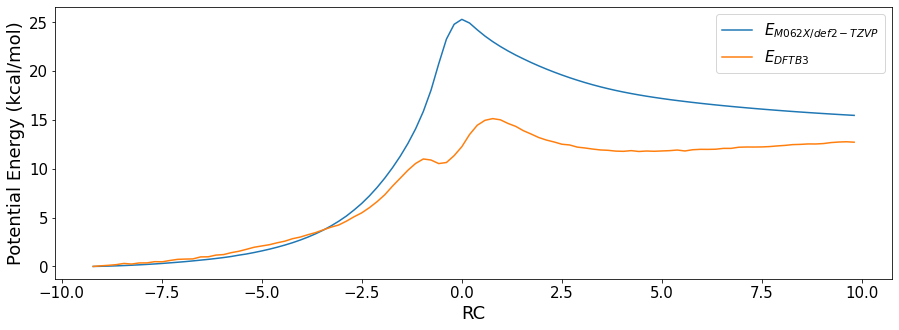

In [4]:
import matplotlib.pyplot as plt
#plt.ion()
plt.figure(figsize=(15, 5))
font = {'color':  'black',
        'weight': 'normal',
        'size': 19}
#plt.title("Single-point calculations on IRC profile's DFT geometries", fontdict=font)
deltaE=np.array(y_dft)-np.array(y_dftb)
#plt.plot(x_dft, deltaE, label=r"$\Delta E_{DFT-DFTB3}$", linestyle='dashed', linewidth=1.5, c='red', marker='', markersize=3.0)
plt.plot(x_dft, y_dft, label=r"$E_{M062X/def2-TZVP}$", linestyle='solid', linewidth=1.5, c='tab:blue', marker='', markersize=3.0)
plt.plot(x_dft, y_dftb, label=r"$E_{DFTB3}$", linestyle='solid', linewidth=1.5, c='tab:orange', marker='', markersize=3.0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('RC', fontsize=18)
plt.ylabel('Potential Energy (kcal/mol)', fontsize=18)
plt.legend(fontsize=15)
#plt.savefig('IRC_DFT_vs_DFTB3.png', dpi=1200, transparent=True)
plt.show()

# Experiment combining harmonic functions

<IPython.core.display.Javascript object>


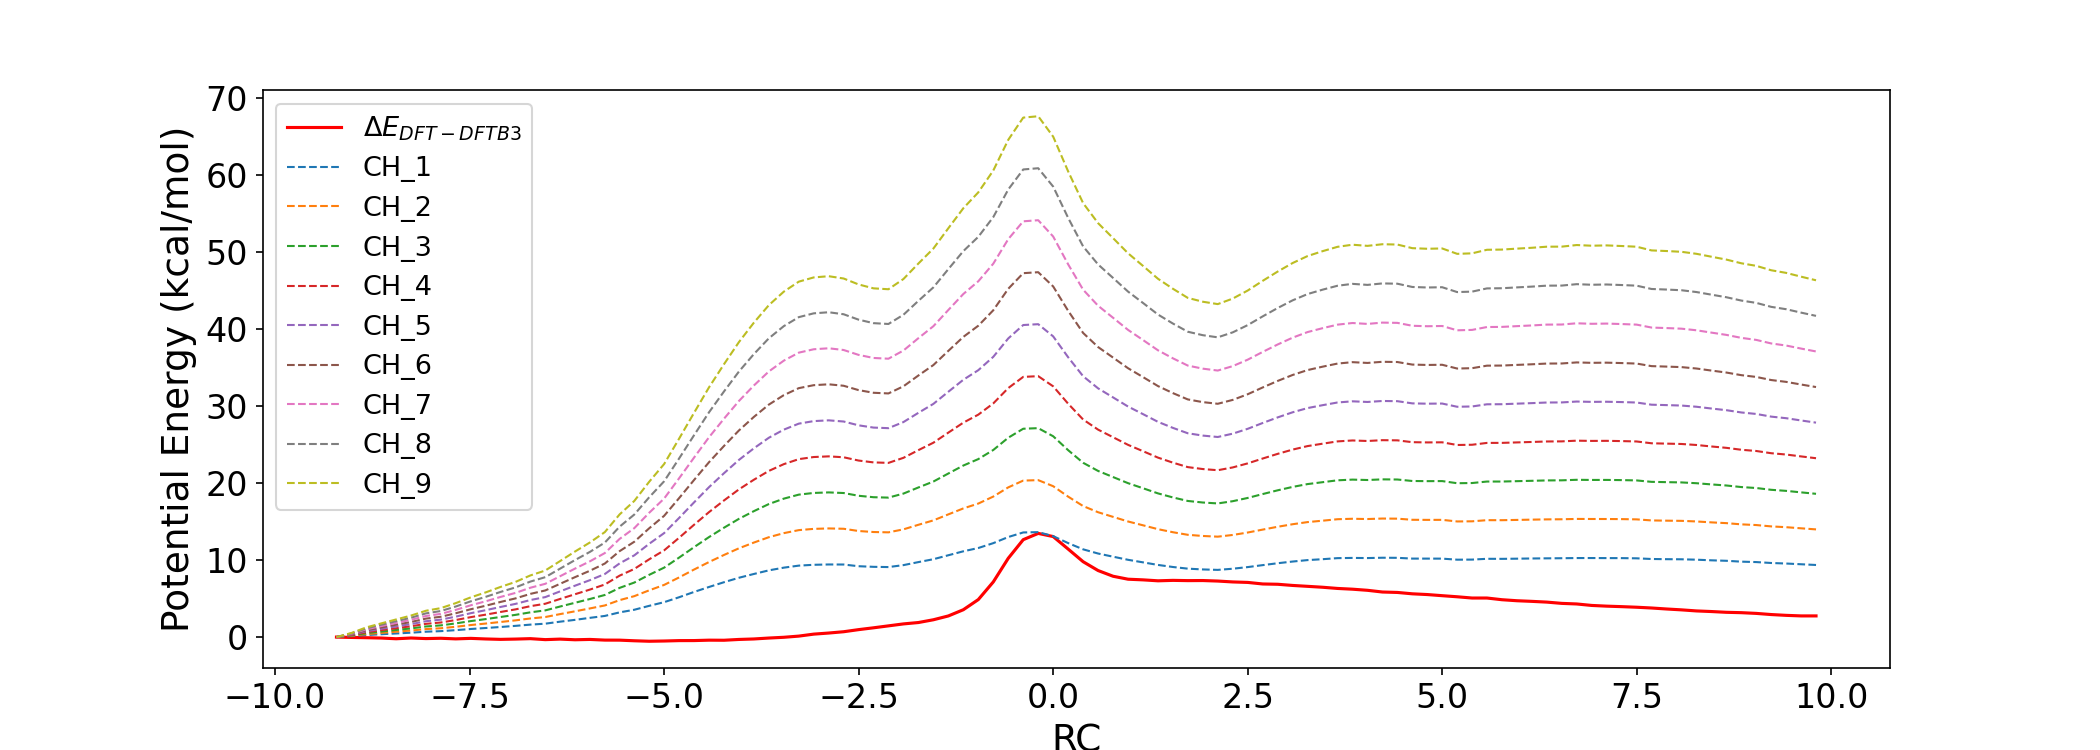

In [7]:
import matplotlib.pyplot as plt
#plt.ion()
plt.figure(figsize=(14, 5))
p=ParamHandler(orig_param_file=skf_folder_path+"/C-H.skf", traj_file=trj_path)
x_orig, y_orig = p.get_potential_from_dist(elem1='C', elem2='H')
#plt.plot(x_orig, y_orig, label="Orig_potential", linestyle='solid', linewidth=1.5, marker='o', markerfacecolor='blue', markersize=2)
#plt.title(r"Increments in RPs and $\Delta E_{DFT-DFTB3}$ along the IRC profile", fontdict=font)
plt.plot(x_dft, deltaE, label=r"$\Delta E_{DFT-DFTB3}$", linestyle='solid', linewidth=1.5, c='red', marker='', markersize=3.0)


ener_dict={}
for i in range(1,10,1):
    v=1.0+i 
    p.sum_bounded_harmonic(x1=1.8, x2=3.5, set_curve=True, top_val=float(3*v), index=18)
    p.sum_bounded_harmonic(x1=1.95, x2=3.45, set_curve=False, top_val=-float(2*v), index=18)
    p.sum_bounded_harmonic(x1=1.85, x2=3.0, set_curve=False, top_val=float(3*v), index=18)
    p.sum_bounded_harmonic(x1=2.0, x2=2.95, set_curve=False, top_val=-float(2*v), index=18)
    
    p.modify_params_to(param_file=skf_folder_path+"/C-H.skf", output_param_file=modif_skf_folder_path.replace('IDPRM',f"mod{i}") + "/C-H.skf")
    p.modify_params_to(param_file=skf_folder_path+"/H-C.skf", output_param_file=modif_skf_folder_path.replace('IDPRM',f"mod{i}") + "/H-C.skf")
    _, y = p.get_mod_potential_from_dist(elem1='C', elem2='H')
    tmpx, tmpy = p.run_sqm(sqm_path=sqm_path, amber_home=amber_home.replace('IDPRM',f"mod{i}"), run_path=test_path+f"_mod{i}")
    p.modify_params_to(param_file=skf_folder_path+"/C-H.skf", output_param_file=test_path+f"_mod{i}/C-H.skf")
    p.modify_params_to(param_file=skf_folder_path+"/H-C.skf", output_param_file=test_path+f"_mod{i}/H-C.skf")
    ener_dict[i]=[tmpx, tmpy]
    dE=y-y_orig
    dE=dE-min(dE)
    plt.plot(x_dft, dE, label=f"CH_{i}", linestyle='dashed', linewidth=1, marker='', markersize=1)
    p.reset_mod_params()
    
plt.xlabel('RC', fontsize=18)
plt.ylabel('Potential Energy (kcal/mol)', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=13)
plt.savefig('DFTB3_CH_DELTA_E.png', dpi=1200, transparent=True)
plt.show()

<IPython.core.display.Javascript object>


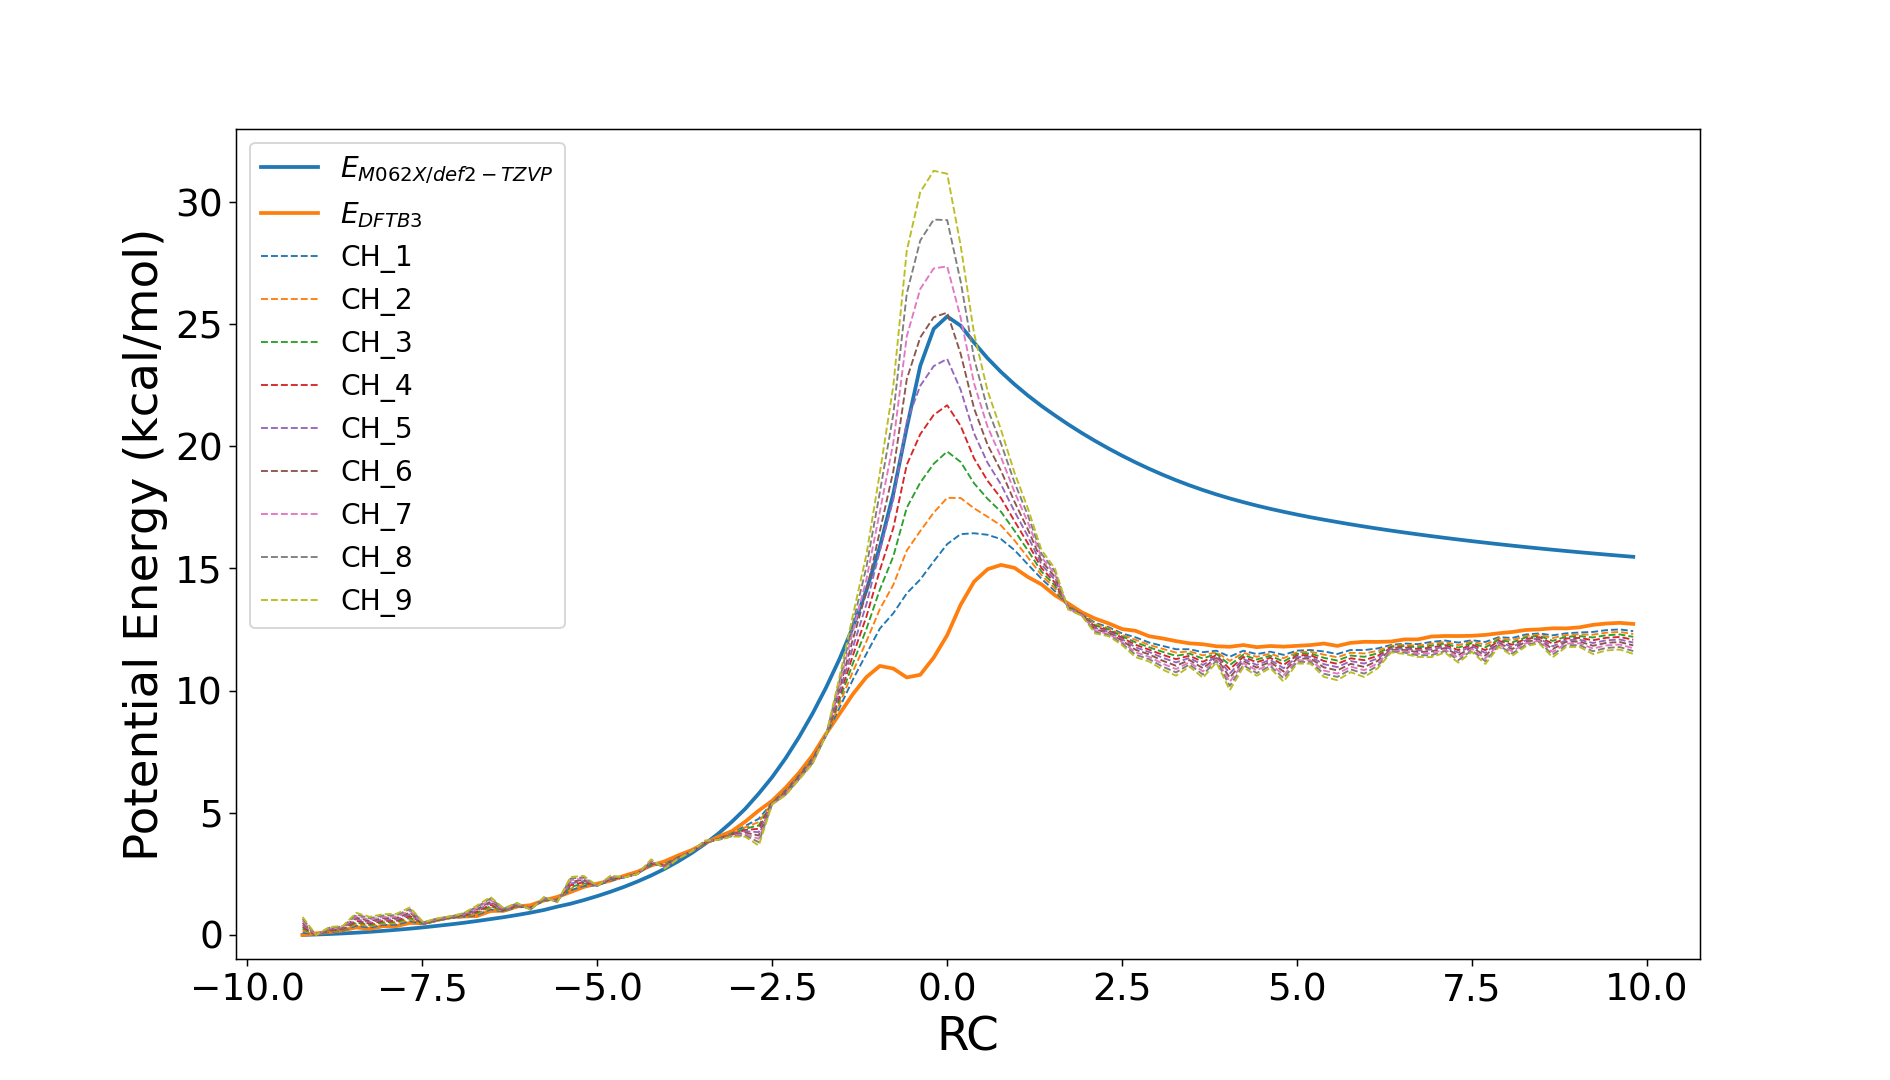

In [41]:
import matplotlib.pyplot as plt1
#plt1.ion()
plt1.figure(figsize=(14, 8))
font = {'color':  'black',
        'weight': 'normal',
        'size': 18}
#plt1.title("Single-point calculations on IRC profile's DFT geometries", fontdict=font)
plt1.plot(x_dft, y_dft, label=r"$E_{M062X/def2-TZVP}$", linestyle='solid', linewidth=2.0, c='tab:blue', marker='', markersize=3.0)
plt1.plot(x_dft, y_dftb, label=r"$E_{DFTB3}$", linestyle='solid', linewidth=2.0, c='tab:orange', marker='', markersize=3.0)

for i in sorted(ener_dict.keys()): 
    pair=ener_dict[i]
    v=1.0+i
    if v < 3000.3:
        plt1.plot(x_dft, pair[1], label=f"CH_{i}", linestyle='dashed', linewidth=1, marker='', markersize=2)
#plt1.tight_layout()
plt1.ylim([-1,33])
plt1.xlabel('RC', fontsize=25)
plt1.ylabel('Potential Energy (kcal/mol)', fontsize=25)
plt1.yticks(fontsize=20)
plt1.xticks(fontsize=20)
plt1.legend(fontsize=15)
#plt1.savefig('IRC_PROFILES_FOR_Fitting_RP_function_CH.png', dpi=1200, transparent=True)
plt1.show()

## Visualization of the RPs 

<IPython.core.display.Javascript object>


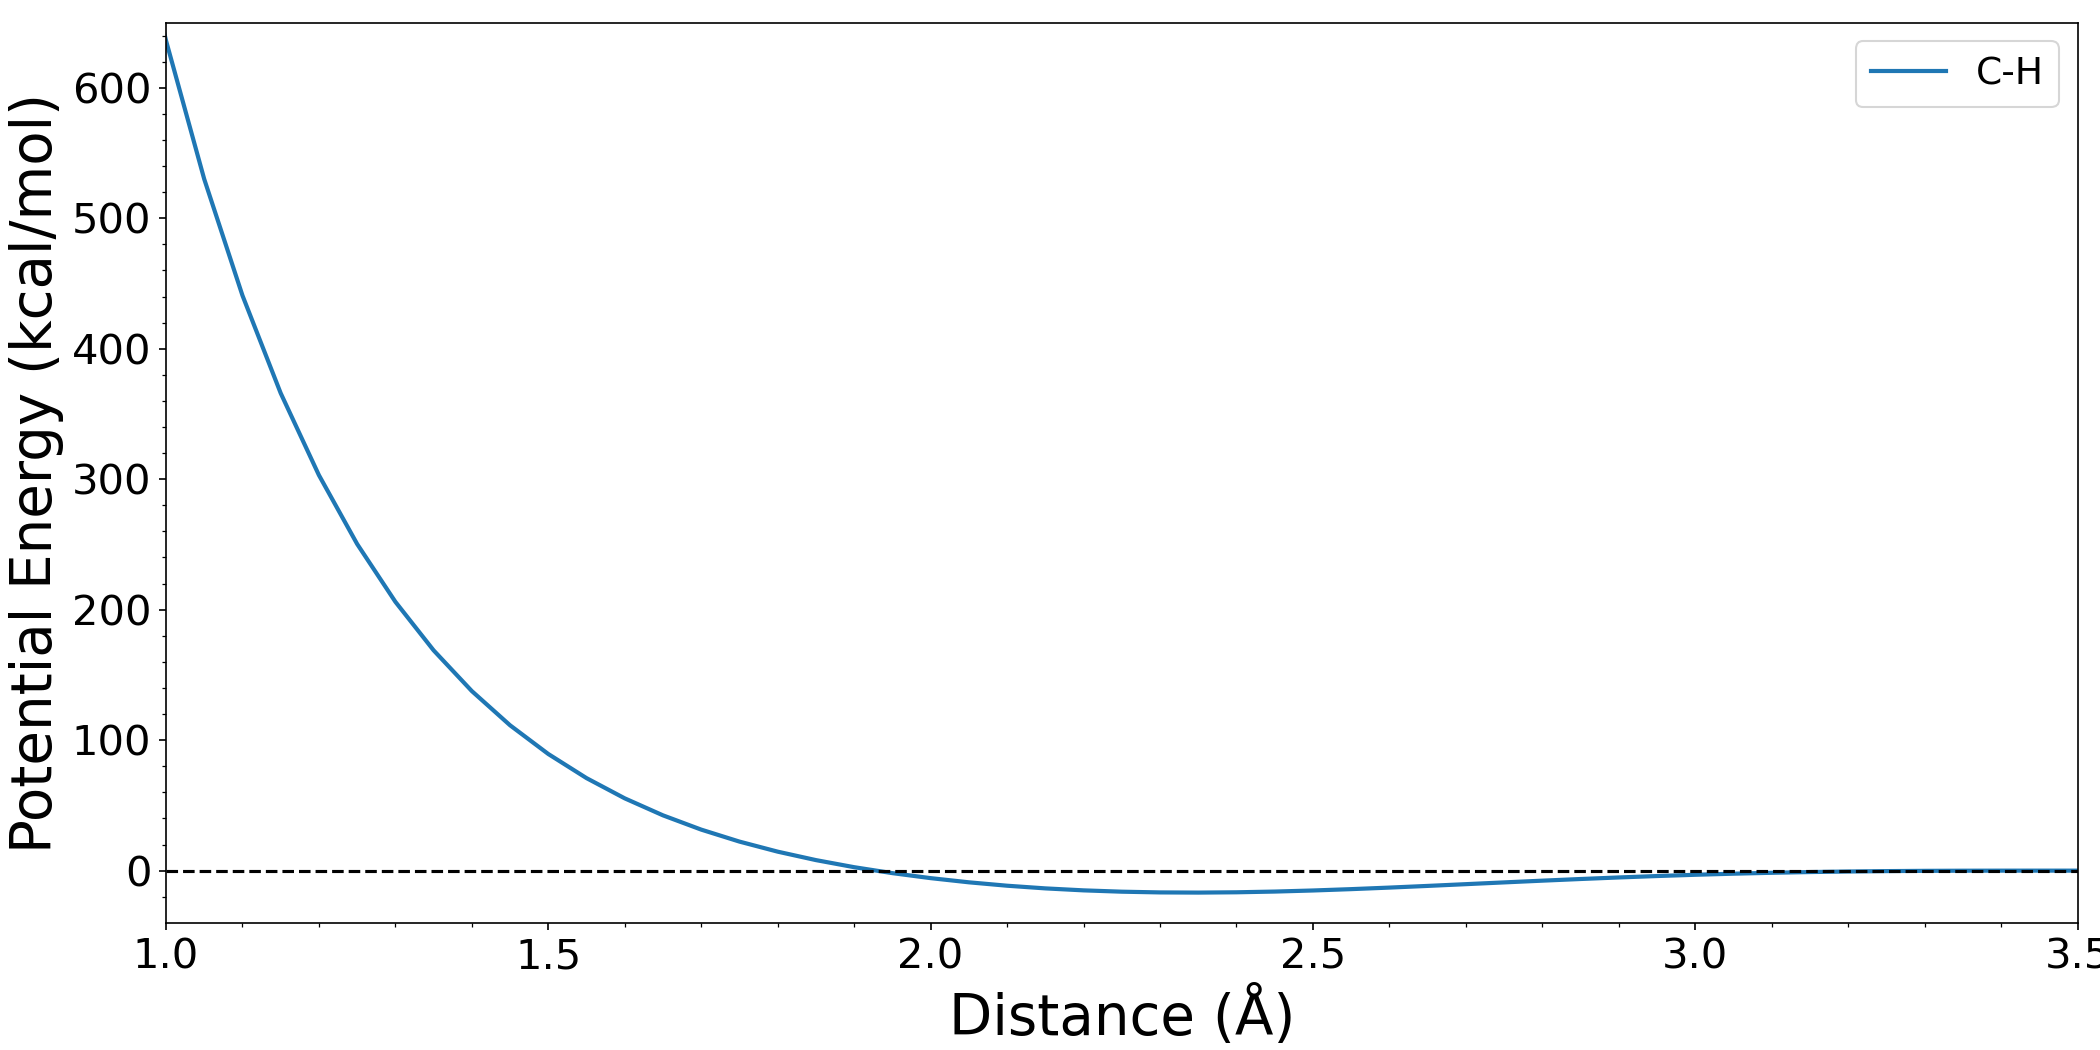

In [18]:
import matplotlib.pyplot as plt2
plt2.ion()

p1=ParamHandler(orig_param_file=skf_folder_path+"/C-H.skf", traj_file=trj_path)
p1.reset_mod_params()

fig, ax = plt2.subplots(figsize=(14, 7))

#ax.set_title("Repulsive Potential Function", fontsize=20)
ax.set_xlabel('Distance (Å)', fontsize=27)
ax.set_ylabel('Potential Energy (kcal/mol)', fontsize=27)

plt2.plot(p1.orig_param.x, p1.orig_param.y, label="C-H", linestyle='solid', 
          linewidth=2.0, color='tab:blue', marker='', markerfacecolor='black', 
          markersize=4)

xlimits=[1.0,3.5]
ylimits=[-40,650]
#plt2.grid()
plt2.tight_layout()
plt2.minorticks_on()
plt2.xlim(xlimits[0], xlimits[1])
plt2.ylim(ylimits[0], ylimits[1])
plt2.yticks(fontsize=20)
plt2.xticks(fontsize=20)
plt2.axhline(y=0.0, color='black', linestyle='--')

   

#plt2.text(2.15,-4,'Attractive', color='blue',fontsize=17)
#plt2.text(2.15,4,'Repulsive', color='red',fontsize=17)
plt2.legend(fontsize=18,loc='upper right')
plt2.savefig('RP_function_CH.png', dpi=1200, transparent=True)
plt2.show()

<IPython.core.display.Javascript object>


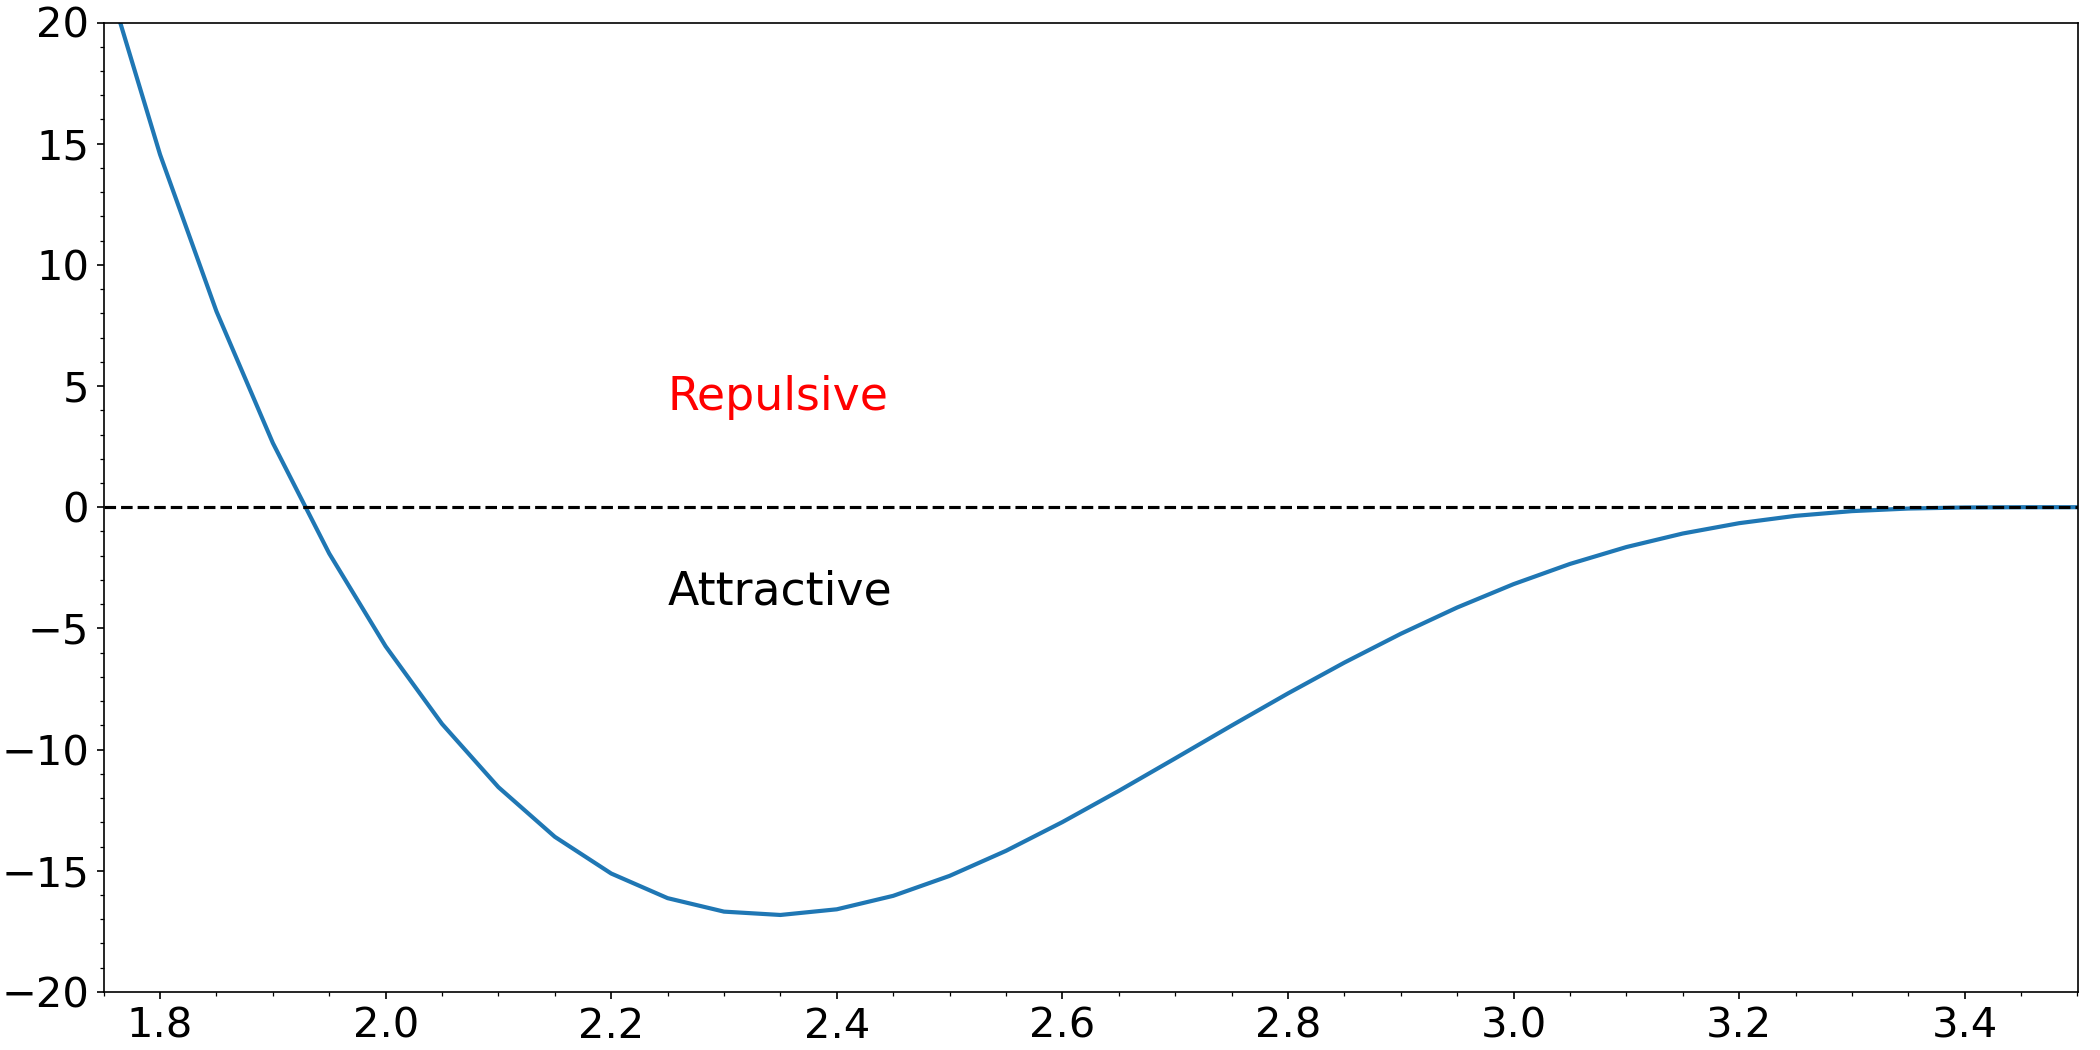

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt2
plt2.ion()

p1=ParamHandler(orig_param_file=skf_folder_path+"/C-H.skf", traj_file=trj_path)
p1.reset_mod_params()

fig, ax = plt2.subplots(figsize=(14, 7))

#ax.set_title("Repulsive Potential Function", fontsize=20)
#ax.set_xlabel('Distance (Å)', fontsize=19)
#ax.set_ylabel('Potential Energy (kcal/mol)', fontsize=19)

plt2.plot(p1.orig_param.x, p1.orig_param.y, label="C-H", linestyle='solid', 
          linewidth=2.0, color='tab:blue', marker='', markerfacecolor='black', 
          markersize=4)

xlimits=[1.75,3.5]
ylimits=[-20,20]
#plt2.grid()
plt2.tight_layout()
plt2.minorticks_on()
plt2.xlim(xlimits[0], xlimits[1])
plt2.ylim(ylimits[0], ylimits[1])
plt2.yticks(fontsize=20)
plt2.xticks(fontsize=20)
plt2.axhline(y=0.0, color='black', linestyle='--')

   

plt2.text(2.25,-4,'Attractive', color='black',fontsize=22)
plt2.text(2.25,4,'Repulsive', color='red',fontsize=22)
#plt2.legend(fontsize=16,loc='upper right')
plt2.savefig('RP_function_CH_zoom1.png', dpi=1200, transparent=True)
plt2.show()

<IPython.core.display.Javascript object>


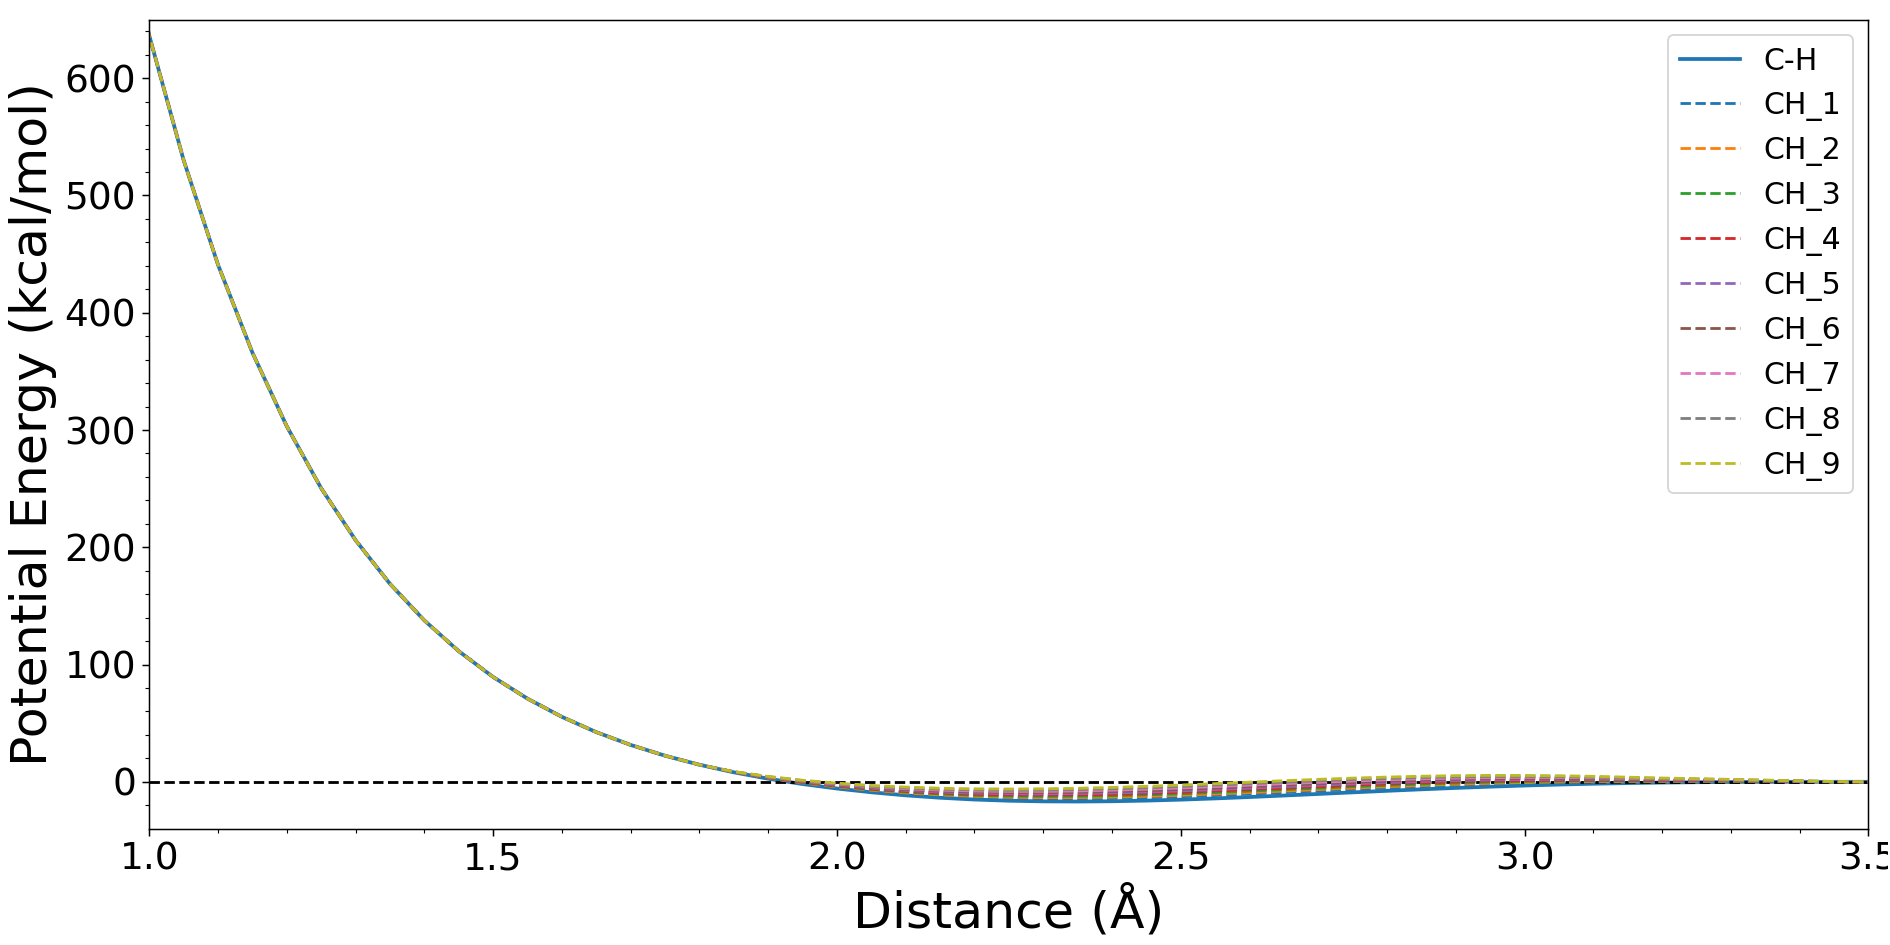

In [21]:
%matplotlib notebook
import matplotlib.pyplot as plt2
plt2.ion()

p1=ParamHandler(orig_param_file=skf_folder_path+"/C-H.skf", traj_file=trj_path)
p1.reset_mod_params()

fig, ax = plt2.subplots(figsize=(14, 7))

#ax.set_title("Repulsive Potential Function", fontsize=27)
ax.set_xlabel('Distance (Å)', fontsize=27)
ax.set_ylabel('Potential Energy (kcal/mol)', fontsize=27)

plt2.plot(p1.orig_param.x, p1.orig_param.y, label="C-H", linestyle='solid', 
          linewidth=2.0, color='tab:blue', marker='', markerfacecolor='black', 
          markersize=4)

xlimits=[1.0,3.5]
ylimits=[-40,650]
#plt2.grid()
plt2.tight_layout()
plt2.minorticks_on()
plt2.xlim(xlimits[0], xlimits[1])
plt2.ylim(ylimits[0], ylimits[1])
plt2.yticks(fontsize=20)
plt2.xticks(fontsize=20)
plt2.axhline(y=0.0, color='black', linestyle='--')

for i in sorted(ener_dict.keys()):
    v=1.0+i
    p1=ParamHandler(orig_param_file=skf_folder_path+"/C-H.skf", 
                    traj_file=trj_path)
    p1.reset_mod_params()
    p1.sum_bounded_harmonic(x1=1.8, x2=3.5, set_curve=True, 
                            top_val=float(3*v), index=18)
    p1.sum_bounded_harmonic(x1=1.85, x2=3.45, set_curve=False, 
                            top_val=-float(2.0*v), index=18)
    p1.sum_bounded_harmonic(x1=1.8, x2=3.2, set_curve=False, 
                            top_val=float(3*v), index=18)
    p1.sum_bounded_harmonic(x1=1.85, x2=3.17, set_curve=False, 
                            top_val=-float(2.7*v), index=18)
    plt2.plot(p1.mod_param.x, p1.mod_param.mod_y, label=f"CH_{i}", 
              linestyle='dashed', linewidth=1.5, marker='', 
              markerfacecolor='red', markersize=6)
    

#plt2.text(2.15,-4,'Attractive', color='blue',fontsize=17)
#plt2.text(2.15,4,'Repulsive', color='red',fontsize=17)
plt2.legend(fontsize=16,loc='upper right')
plt2.savefig('Fitting_RP_function_CH.png', dpi=1200, transparent=True)
plt2.show()

<IPython.core.display.Javascript object>


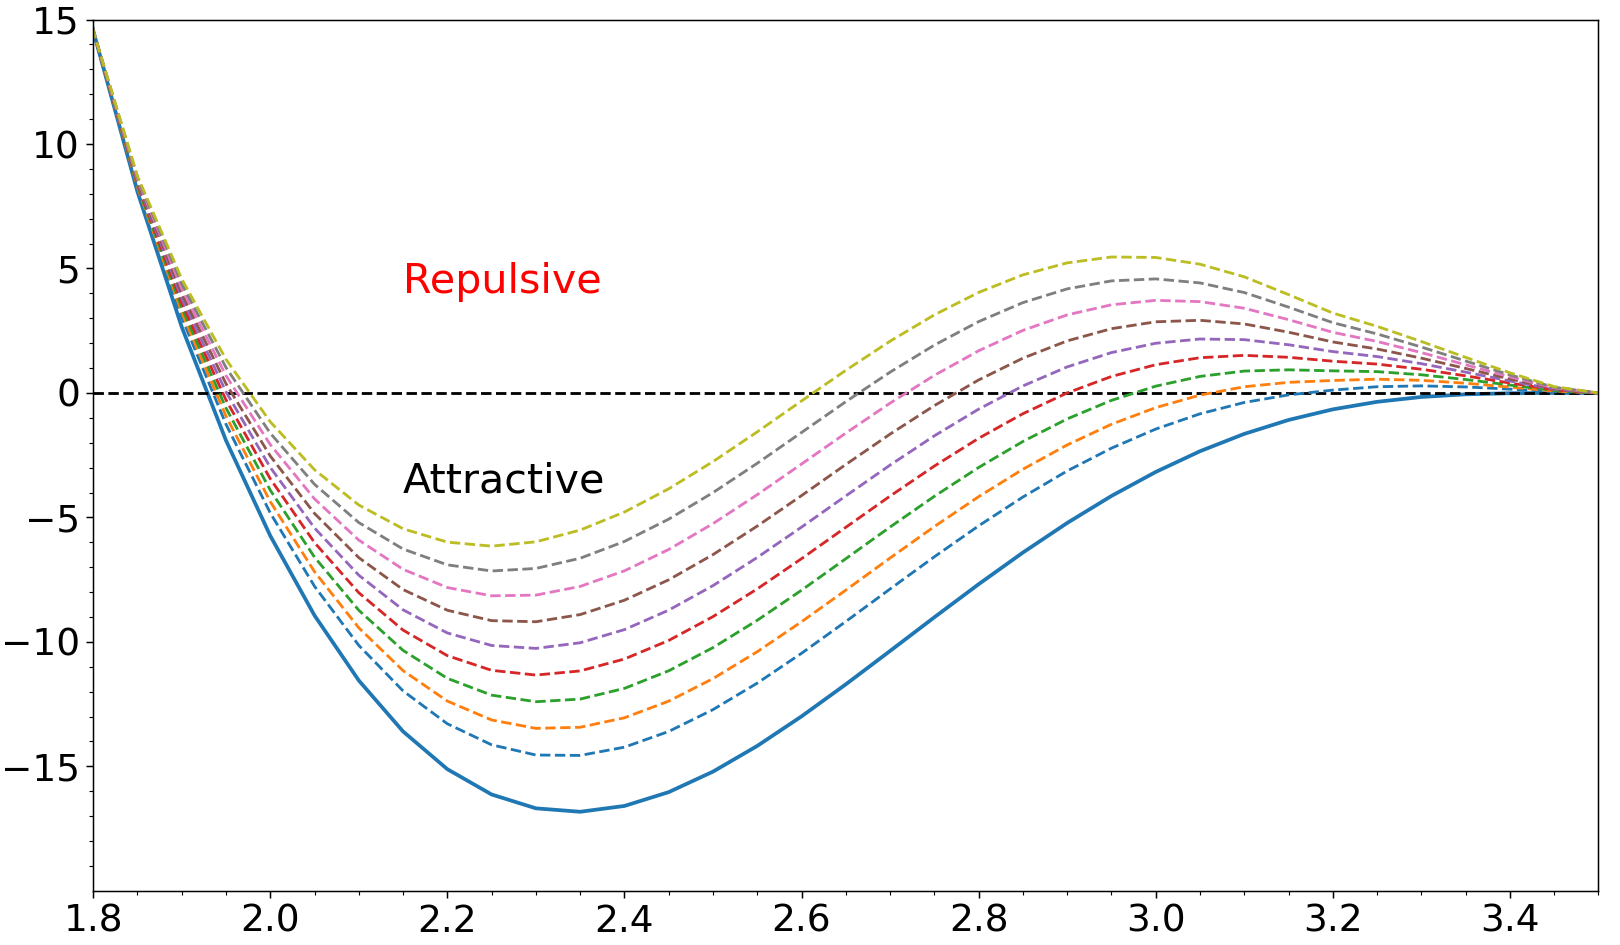

In [29]:
%matplotlib notebook
import matplotlib.pyplot as plt2
plt2.ion()

p1=ParamHandler(orig_param_file=skf_folder_path+"/C-H.skf", traj_file=trj_path)
p1.reset_mod_params()

fig, ax = plt2.subplots(figsize=(12, 7))

#ax.set_title("Repulsive Potential Function", fontsize=20)
#ax.set_xlabel('Distance (Å)', fontsize=19)
#ax.set_ylabel('Potential Energy (kcal/mol)', fontsize=19)

plt2.plot(p1.orig_param.x, p1.orig_param.y, label="C-H", linestyle='solid', 
          linewidth=2.0, color='tab:blue', marker='', markerfacecolor='black', 
          markersize=4)

xlimits=[1.8,3.5]
ylimits=[-20,15]
#plt2.grid()
plt2.tight_layout()
plt2.minorticks_on()
plt2.xlim(xlimits[0], xlimits[1])
plt2.ylim(ylimits[0], ylimits[1])
yticks=plt2.yticks()[0]
plt2.yticks(ticks=yticks[1:], fontsize=20)
plt2.xticks(fontsize=20)
plt2.axhline(y=0.0, color='black', linestyle='--')

for i in sorted(ener_dict.keys()):
    v=1.0+i
    p1=ParamHandler(orig_param_file=skf_folder_path+"/C-H.skf", 
                    traj_file=trj_path)
    p1.reset_mod_params()
    p1.sum_bounded_harmonic(x1=1.8, x2=3.5, set_curve=True, 
                            top_val=float(3*v), index=18)
    p1.sum_bounded_harmonic(x1=1.85, x2=3.45, set_curve=False, 
                            top_val=-float(2.0*v), index=18)
    p1.sum_bounded_harmonic(x1=1.8, x2=3.2, set_curve=False, 
                            top_val=float(3*v), index=18)
    p1.sum_bounded_harmonic(x1=1.85, x2=3.17, set_curve=False, 
                            top_val=-float(2.7*v), index=18)
    plt2.plot(p1.mod_param.x, p1.mod_param.mod_y, label=f"CH_{i}", 
              linestyle='dashed', linewidth=1.5, marker='', 
              markerfacecolor='red', markersize=6)
    

plt2.text(2.15,-4,'Attractive', color='black',fontsize=22)
plt2.text(2.15,4,'Repulsive', color='red',fontsize=22)
#plt2.legend(fontsize=15,loc='upper right')
plt2.savefig('Fitting_RP_function_CH_zoom1.png', dpi=1200, transparent=True)
plt2.show()